# 1. Softmax回归

① Softmax回归虽然它的名字是回归，其实它是一个分类问题。

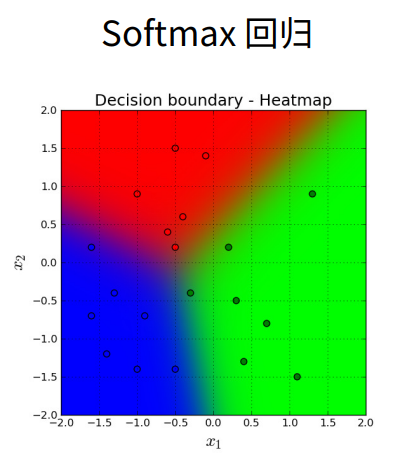

# 2. 回归VS分类

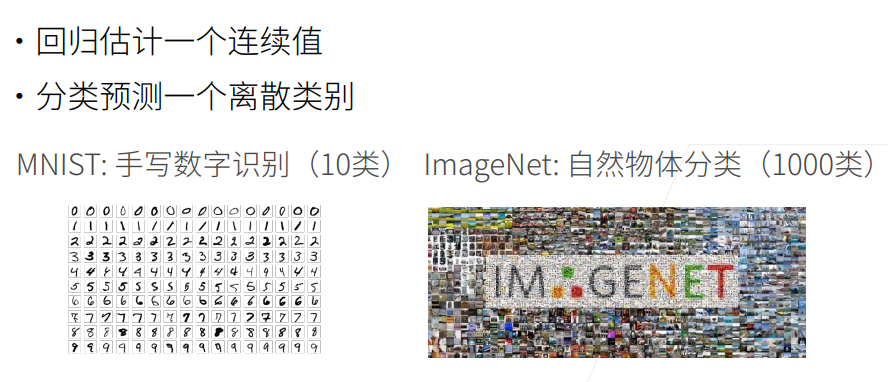

# 3. Kaggle分类问题

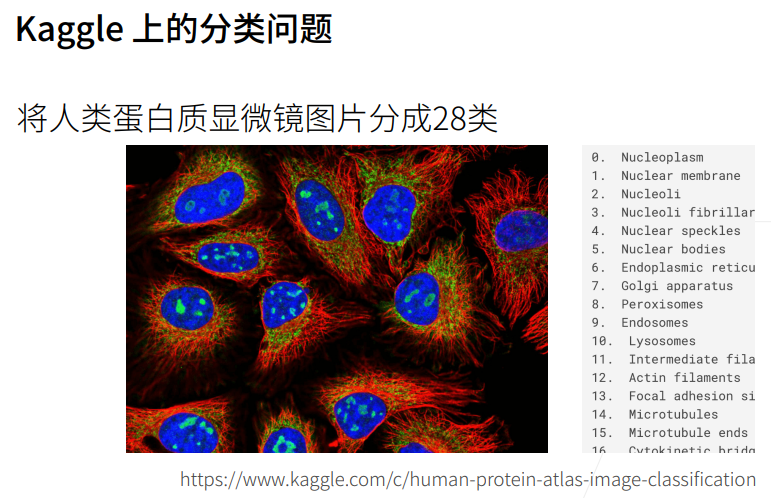

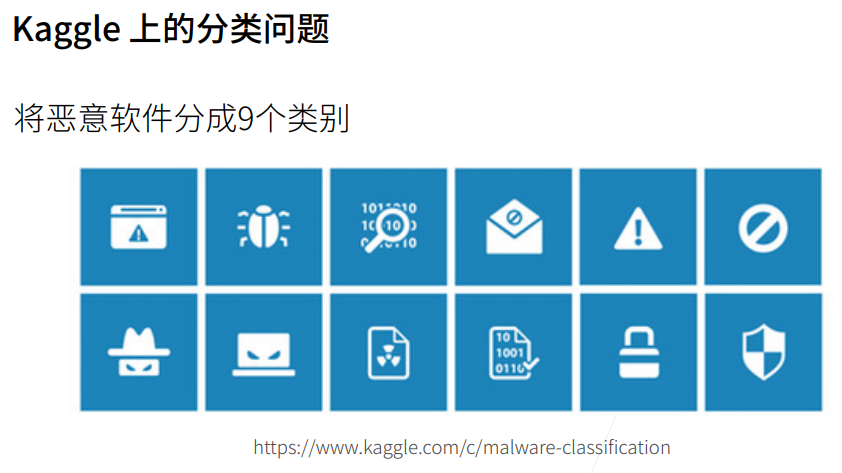

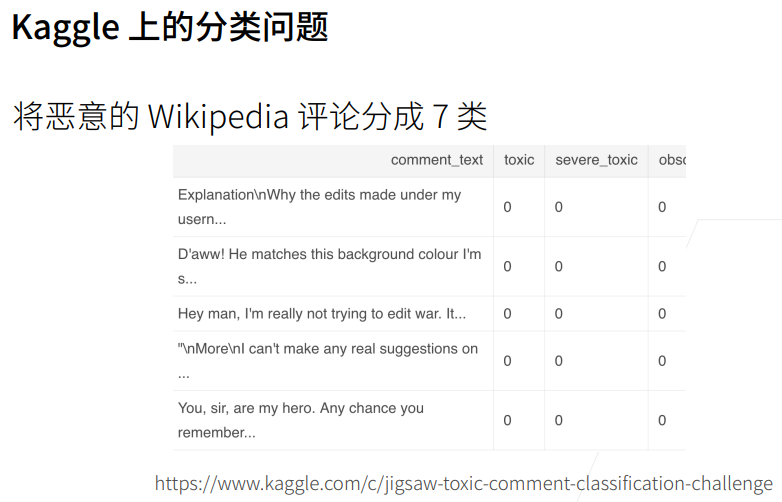

# 4. 回归到分类

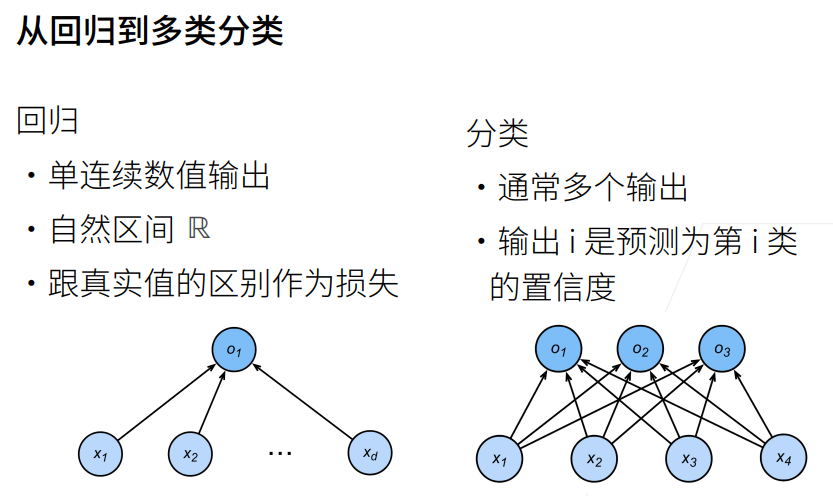

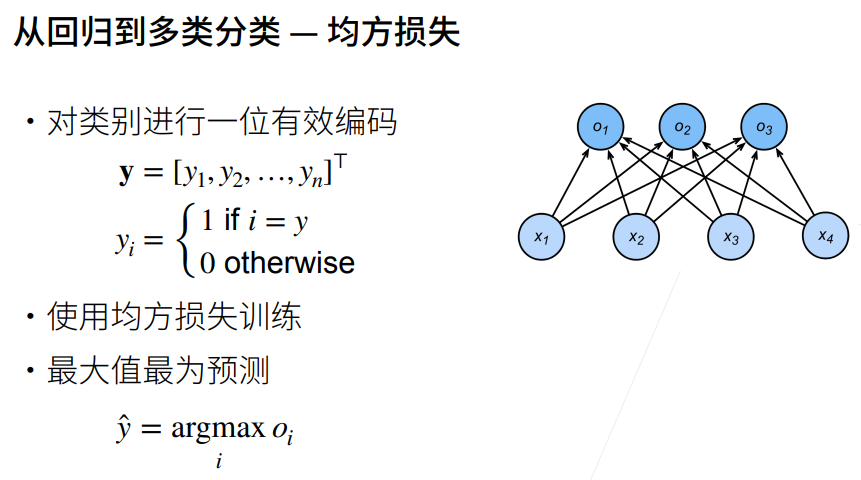

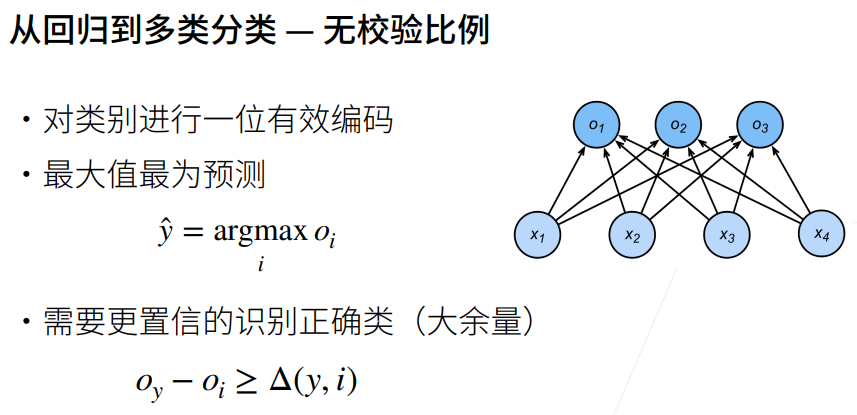

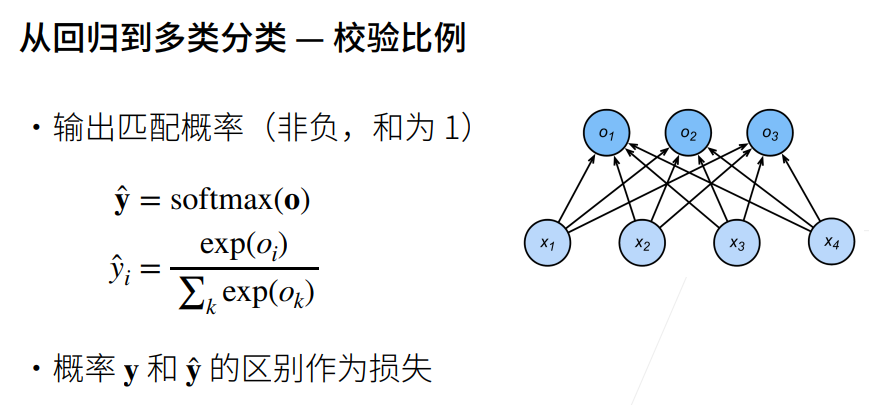

# 5. 交叉熵损失

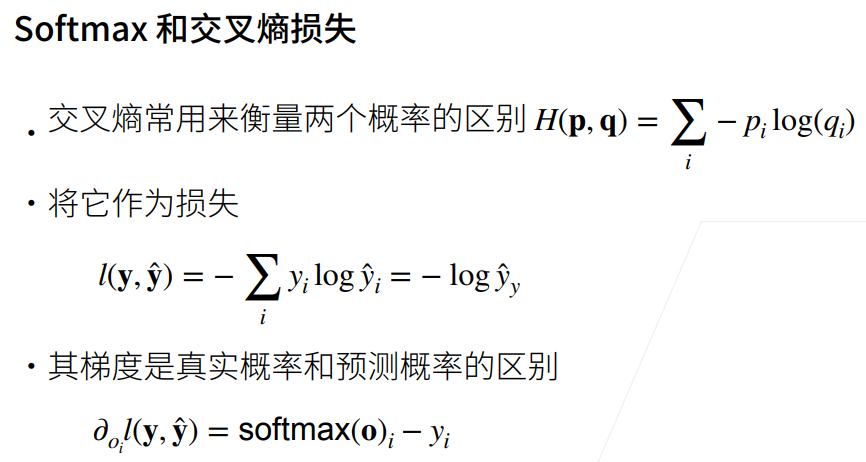

# 6. 总结

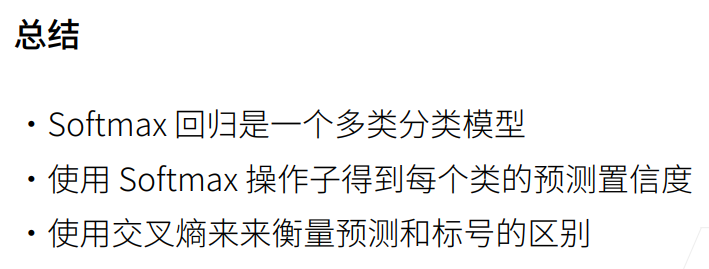

# 7. 损失函数

① 三个常用的损失函数 L2 loss、L1 loss、Huber's Robust loss。

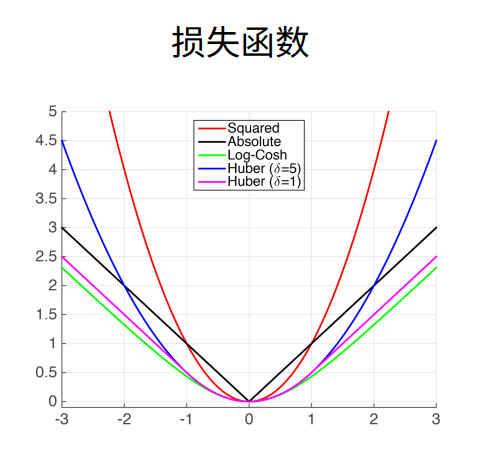

# 8. L2 Loss

① 蓝色曲线为当y=0时，变换y'所获得的曲线。

② 绿色曲线为当y=0时，变换y'所获得的曲线的似然函数，即$1^{-l(y,y')}$，似然函数呈高斯分布。最小化损失函数就是最大化似然函数。

③ 橙色曲线为损失函数的梯度，梯度是一次函数，所以穿过原点。

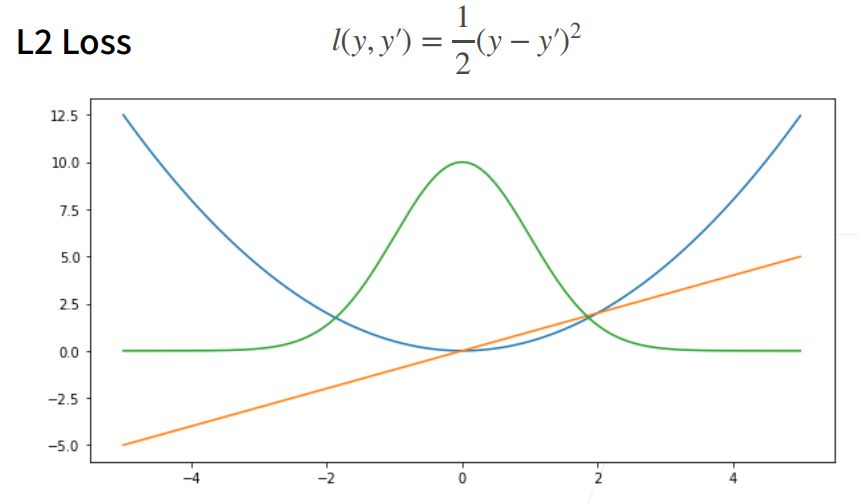

④ 当预测值y'跟真实值y隔的比较远的时候，(真实值y为0，预测值就是下面的曲线里的x轴)，梯度比较大，所以参数更新比较多。

⑤ 随着预测值靠近真实值是，梯度越来越小，参数的更新越来越小。

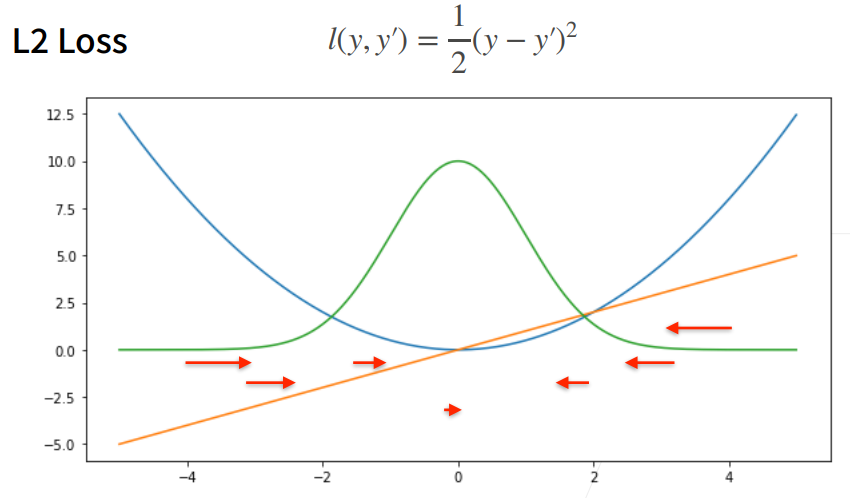

# 9. L1 Loss

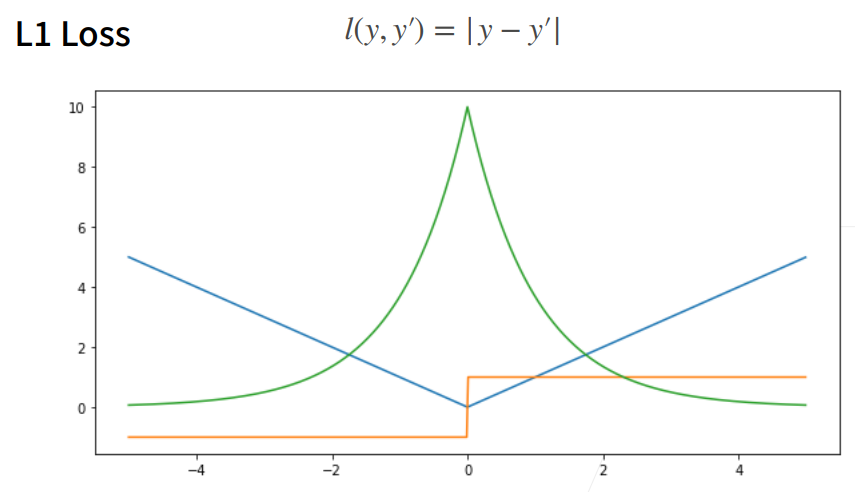

① 相对L2 loss，L1 loss的梯度就是距离原点时，梯度也不是特别大，权重的更新也不是特别大。会带来很多稳定性的好处。

② 他的缺点是在零点处不可导，并在零点处左右有±1的变化，这个不平滑性导致预测值与真实值靠的比较近的时候，优化到末期的时候，可能会不那么稳定。

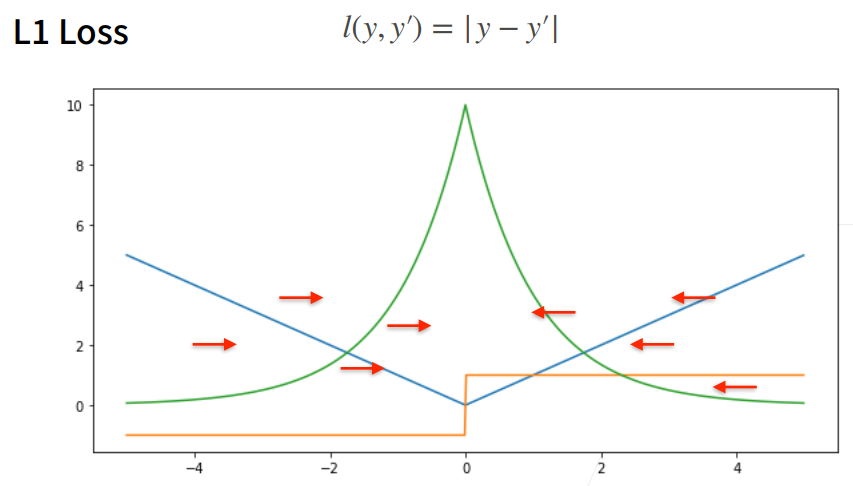

# 10. Huber's Robust Loss

① 结合L1 loss 和L2 loss损失。

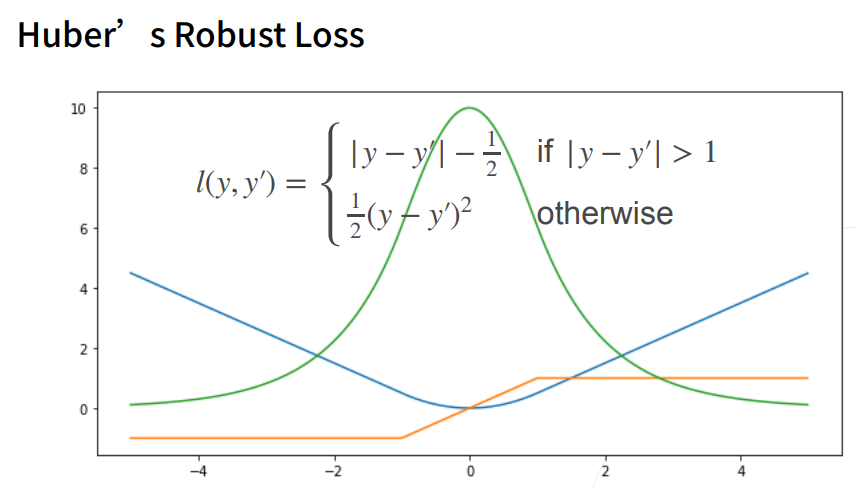

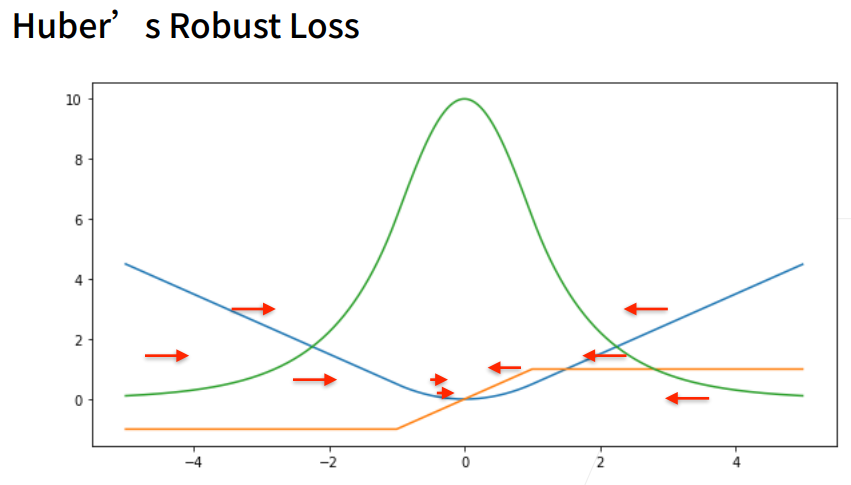

# 1. 图像分类数据集

① MINIST数据集是图像分类中广泛使用的数据集之一，但作为基准数据集过于简单。

② 下面将使用类似但更复杂的Fashion-MNIST数据集。

## 1.1 显示图片

In [1]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

# SVG是一种无损格式 – 意味着它在压缩时不会丢失任何数据，可以呈现无限数量的颜色。
# SVG最常用于网络上的图形、徽标可供其他高分辨率屏幕上查看。
d2l.use_svg_display() # 使用svg来显示图片，这样清晰度高一些。

In [2]:
help(d2l.use_svg_display)

Help on function use_svg_display in module d2l.torch:

use_svg_display()
    Use the svg format to display a plot in Jupyter.



## 1.2 数据集下载

In [3]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式
# 并除以255使得所有像素的数值均在0到1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=True,transform=trans,download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=False,transform=trans,download=True)            
print(len(mnist_train)) # 训练数据集长度
print(len(mnist_test))  # 测试数据集长度

print(mnist_train[0][0].shape) # 黑白图片，所以channel为1。
print(mnist_train[0][1]) # [0][0]表示第一个样本的图片信息，[0][1]表示该样本对应的标签值

60000
10000
torch.Size([1, 28, 28])
9


## 1.3 可视化数据集

Figure(972x216)
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:>]]
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:>]
i: 0
ax,img: AxesSubplot(0.125,0.536818;0.0731132x0.343182) tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.00

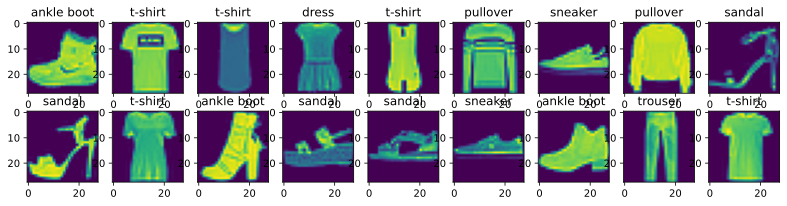

In [4]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式
# 并除以255使得所有像素的数值均在0到1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=True,transform=trans,download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=False,transform=trans,download=True)            

def get_fashion_mnist_labels(labels):
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt','trouser','pullover','dress','coat',
                   'sandal','shirt','sneaker','bag','ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale) # 传进来的图像尺寸，scale 为放缩比例因子
    _, axes = d2l.plt.subplots(num_rows,num_cols,figsize=figsize)
    print(_)
    print(axes) # axes 为构建的两行九列的画布
    axes = axes.flatten()
    print(axes) # axes 变成一维数据
    for i,(ax,img) in enumerate(zip(axes,imgs)):
        if(i<1):
            print("i:",i)
            print("ax,img:",ax,img)
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
            ax.set_title(titles[i])
        else:
            # PIL图片
            ax.imshow(img)
            
X, y = next(iter(data.DataLoader(mnist_train,batch_size=18))) # X，y 为仅抽取一次的18个样本的图片、以及对应的标签值
show_images(X.reshape(18,28,28),2,9,titles=get_fashion_mnist_labels(y))

## 1.4 小批量数据集

Figure(972x216)
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:>]]
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:>]


'4.17sec'

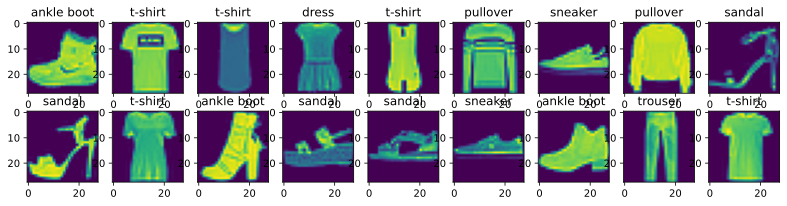

In [5]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式
# 并除以255使得所有像素的数值均在0到1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=True,transform=trans,download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=False,transform=trans,download=True)            

def get_fashion_mnist_labels(labels):
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt','trouser','pullover','dress','coat',
                   'sandal','shirt','sneaker','bag','ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale) # 传进来的图像尺寸，scale 为放缩比例因子
    _, axes = d2l.plt.subplots(num_rows,num_cols,figsize=figsize)
    print(_)
    print(axes) # axes 为构建的两行九列的画布
    axes = axes.flatten()
    print(axes) # axes 变成一维数据
    for i,(ax,img) in enumerate(zip(axes,imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
            ax.set_title(titles[i])
        else:
            # PIL图片
            ax.imshow(img)
            
X, y = next(iter(data.DataLoader(mnist_train,batch_size=18))) # X，y 为仅抽取一次的18个样本的图片、以及对应的标签值
show_images(X.reshape(18,28,28),2,9,titles=get_fashion_mnist_labels(y))

batch_size = 256
def get_dataloader_workers():
    """使用4个进程来读取的数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers())

timer = d2l.Timer() # 计时器对象实例化，开始计时
for X,y in train_iter:  # 遍历一个batch_size数据的时间
    continue
f'{timer.stop():.2f}sec' # 计时器停止时，停止与开始的时间间隔事件

In [6]:
help(d2l.Timer)

Help on class Timer in module d2l.torch:

class Timer(builtins.object)
 |  Record multiple running times.
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  avg(self)
 |      Return the average time.
 |  
 |  cumsum(self)
 |      Return the accumulated time.
 |  
 |  start(self)
 |      Start the timer.
 |  
 |  stop(self)
 |      Stop the timer and record the time in a list.
 |  
 |  sum(self)
 |      Return the sum of time.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



## 1.5 加载数据集

Figure(972x216)
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:>]]
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:>]


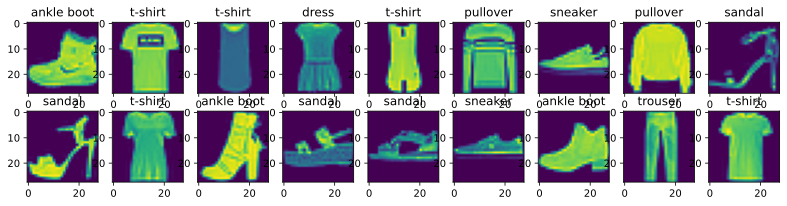

In [7]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式
# 并除以255使得所有像素的数值均在0到1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=True,transform=trans,download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=False,transform=trans,download=True)            

def get_fashion_mnist_labels(labels):
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt','trouser','pullover','dress','coat',
                   'sandal','shirt','sneaker','bag','ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale) # 传进来的图像尺寸，scale 为放缩比例因子
    _, axes = d2l.plt.subplots(num_rows,num_cols,figsize=figsize)
    print(_)
    print(axes) # axes 为构建的两行九列的画布
    axes = axes.flatten()
    print(axes) # axes 变成一维数据
    for i,(ax,img) in enumerate(zip(axes,imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
            ax.set_title(titles[i])
        else:
            # PIL图片
            ax.imshow(img)
            
X, y = next(iter(data.DataLoader(mnist_train,batch_size=18))) # X，y 为仅抽取一次的18个样本的图片、以及对应的标签值
show_images(X.reshape(18,28,28),2,9,titles=get_fashion_mnist_labels(y))

batch_size = 256
def get_dataloader_workers():
    """使用4个进程来读取的数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers())

timer = d2l.Timer()
for X,y in train_iter:
    continue
f'{timer.stop():.2f}sec'  # 扫一边数据集的事件

def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize)) # 如果有Resize参数传进来，就进行resize操作
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=True,transform=trans,download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=False,transform=trans,download=True)            
    return (data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()),
           data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()))               

# 2. Softmax回归（使用自定义）

① 就像从零开始实现线性回归一样，应该知道softmax的细节。

## 2.1 训练集、测试集抽取

In [8]:
import torch
from IPython import display
from d2l import torch as d2l

def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize)) # 如果有Resize参数传进来，就进行resize操作
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=True,transform=trans,download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=False,transform=trans,download=True)            
    return (data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()),
           data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()))               

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size) # 返回训练集、测试集的迭代器     

① 将展平每个图像，将它们视为长度784的向量。向量的每个元素与w相乘，所以w也需要784行。

② 因为数据集有10个类别，所以网络输出维度为10.

## 2.2 初始化参数

In [9]:
import torch
from IPython import display
from d2l import torch as d2l

def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize)) # 如果有Resize参数传进来，就进行resize操作
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=True,transform=trans,download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=False,transform=trans,download=True)            
    return (data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()),
           data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()))               

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size) # 返回训练集、测试集的迭代器     

num_inputs = 784
num_outputs = 10
w = torch.normal(0,0.01,size=(num_inputs,num_outputs),requires_grad=True)
b = torch.zeros(num_outputs,requires_grad=True)
print(w.shape)
print(b.shape)

torch.Size([784, 10])
torch.Size([10])


## 2.3 Softmax回归

① 给定一个矩阵X，可以对所有元素求和。

In [10]:
import torch
from IPython import display
from d2l import torch as d2l

x = torch.tensor([[1.0,2.0,3.0],[4.0,5.0,6.0]])
print(x)
print(x.sum(0,keepdim=True)) # 按照列求和
print(x.sum(1,keepdim=True)) # 按照行求和

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[5., 7., 9.]])
tensor([[ 6.],
        [15.]])


② 实现softmax：$\mathrm{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}$

In [11]:
import torch
from IPython import display
from d2l import torch as d2l

def softmax(X):
    X_exp = torch.exp(X) # 每个都进行指数运算
    partition = X_exp.sum(1,keepdim=True) 
    return X_exp / partition # 这里应用了广播机制

# 将每个元素变成一个非负数。此外，依据概率原理，每行总和为1。
X = torch.normal(0,1,(2,5))  # 两行五列的数，数符合标准正态分布
print(X)
X_prob = softmax(X)
print(X_prob) # 形状没有发生变化，还是一个两行五列的矩阵，Softmax转换后所有值为正的  
print(X_prob.sum(1)) # 相当于 X_prob.sum(axis=1) 按行求和，概率和为1

tensor([[ 1.6039, -0.1675,  0.8108, -0.1188,  0.9389],
        [ 0.5993,  0.0179, -1.6758,  1.4489, -1.1852]])
tensor([[0.4319, 0.0735, 0.1954, 0.0771, 0.2221],
        [0.2399, 0.1341, 0.0247, 0.5610, 0.0403]])
tensor([1., 1.])


In [12]:
import torch
from IPython import display
from d2l import torch as d2l

def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize)) # 如果有Resize参数传进来，就进行resize操作
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=True,transform=trans,download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=False,transform=trans,download=True)            
    return (data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()),
           data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()))               

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size) # 返回训练集、测试集的迭代器     

num_inputs = 784
num_outputs = 10
w = torch.normal(0,0.01,size=(num_inputs,num_outputs),requires_grad=True)
b = torch.zeros(num_outputs,requires_grad=True)
print(w.shape)
print(b.shape)

def softmax(X):
    X_exp = torch.exp(X) # 每个都进行指数运算
    partition = X_exp.sum(1,keepdim=True) 
    return X_exp / partition # 这里应用了广播机制

# 实现softmax回归模型
print(w.shape[0]) # w.shape里面的第0个元素，该值为784
def net(X):
    return softmax(torch.matmul(X.reshape((-1,w.shape[0])),w)+b) # -1为默认的批量大小，表示有多少个图片，每个图片用一维的784列个元素表示      

torch.Size([784, 10])
torch.Size([10])
784


## 2.4 交叉熵损失

① 创建一个数据y_hat，其中包含2个样本在3个类别的预测概率，使用y作为y_hat中概率的索引。

In [13]:
y = torch.tensor([0,2]) # 标号索引
y_hat = torch.tensor([[0.1,0.3,0.6],[0.3,0.2,0.5]]) # 两个样本在3个类别的预测概率   
y_hat[[0,1],y] # 把第0个样本对应标号"0"的预测值拿出来、第1个样本对应标号"2"的预测值拿出来

tensor([0.1000, 0.5000])

⑧ 实现交叉熵损失函数。

In [14]:
y = torch.tensor([0,2]) # 标号索引
y_hat = torch.tensor([[0.1,0.3,0.6],[0.3,0.2,0.5]]) # 两个样本在3个类别的预测概率   
y_hat[[0,1],y] # 把第0个样本对应标号的预测值拿出来、第1个样本对应标号的预测值拿出来

def cross_entropy(y_hat, y):
    print(list(range(len(y_hat))))
    return -torch.log(y_hat[range(len(y_hat)),y]) # y_hat[range(len(y_hat)),y]为把y的标号列表对应的值拿出来。传入的y要是最大概率的标号      

print(y_hat.shape)
print(y.shape)
cross_entropy(y_hat,y)

torch.Size([2, 3])
torch.Size([2])
[0, 1]


tensor([2.3026, 0.6931])

## 2.5 准确率

③ 将预测类别与真实y元素进行比较。

In [15]:
import torch
from IPython import display
from d2l import torch as d2l

y = torch.tensor([0,2]) # 标号索引
y_hat = torch.tensor([[0.1,0.3,0.6],[0.3,0.2,0.5]]) # 两个样本在3个类别的预测概率   
y_hat[[0,1],y] # 把第0个样本对应标号的预测值拿出来、第1个样本对应标号的预测值拿出来

print(y_hat.shape)
print(len(y_hat.shape)) # 两个样本
def accuracy(y_hat,y):
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1: # y_hat.shape[1]>1表示不止一个类别，每个类别有各自的概率   
        y_hat = y_hat.argmax(axis=1) # y_hat.argmax(axis=1)为求行最大值的索引
        print("y_hat:",y_hat)
    cmp = y_hat.type(y.dtype) == y # 先判断逻辑运算符==，再赋值给cmp，cmp为布尔类型的数据
    print("cmp:",cmp)
    return float(cmp.type(y.dtype).sum()) # 获得y.dtype的类型作为传入参数，将cmp的类型转为y的类型（int型），然后再求和       

print("accuracy(y_hat,y) / len(y):",accuracy(y_hat,y) / len(y))
print("accuracy(y_hat,y):",accuracy(y_hat,y))
print("len(y):",len(y))

torch.Size([2, 3])
2
y_hat: tensor([2, 2])
cmp: tensor([False,  True])
accuracy(y_hat,y) / len(y): 0.5
y_hat: tensor([2, 2])
cmp: tensor([False,  True])
accuracy(y_hat,y): 1.0
len(y): 2


## 2.6 任意模型

In [16]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

def get_dataloader_workers():
    """使用4个进程来读取的数据"""
    return 4

def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize)) # 如果有Resize参数传进来，就进行resize操作
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=True,transform=trans,download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=False,transform=trans,download=True)            
    return (data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()),
           data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()))               


batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size) # 返回训练集、测试集的迭代器     

num_inputs = 784
num_outputs = 10
w = torch.normal(0,0.01,size=(num_inputs,num_outputs),requires_grad=True)
b = torch.zeros(num_outputs,requires_grad=True)

def softmax(X):
    X_exp = torch.exp(X) # 每个都进行指数运算
    partition = X_exp.sum(1,keepdim=True) 
    return X_exp / partition # 这里应用了广播机制

# 实现softmax回归模型
def net(X):
    return softmax(torch.matmul(X.reshape((-1,w.shape[0])),w)+b) # -1为默认的批量大小，表示有多少个图片，每个图片用一维的784列个元素表示      

def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)),y]) # y_hat[range(len(y_hat)),y]为把y的标号列表对应的值拿出来。传入的y要是最大概率的标号      

def accuracy(y_hat,y):
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1: # y_hat.shape[1]>1表示不止一个类别，每个类别有各自的概率   
        y_hat = y_hat.argmax(axis=1) # y_hat.argmax(axis=1)为求行最大值的索引
    cmp = y_hat.type(y.dtype) == y # 先判断逻辑运算符==，再赋值给cmp，cmp为布尔类型的数据
    return float(cmp.type(y.dtype).sum()) # 获得y.dtype的类型作为传入参数，将cmp的类型转为y的类型（int型），然后再求和       

# 可以评估在任意模型net的准确率
def evaluate_accuracy(net,data_iter):
    """计算在指定数据集上模型的精度"""
    if isinstance(net,torch.nn.Module): # 如果net模型是torch.nn.Module实现的神经网络的话，将它变成评估模式     
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2) # 正确预测数、预测总数，metric为累加器的实例化对象，里面存了两个数
    for X, y in data_iter:
        metric.add(accuracy(net(X),y),y.numel()) # net(X)将X输入模型，获得预测值。y.numel()为样本总数
    return metric[0] / metric[1] # 分类正确的样本数 / 总样本数

# Accumulator实例中创建了2个变量，用于分别存储正确预测的数量和预测的总数量
class Accumulator:
    """在n个变量上累加"""
    def __init__(self,n):
        self.data = [0,0] * n
        
    def add(self, *args):
        self.data = [a+float(b) for a,b in zip(self.data,args)] # zip函数把两个列表第一个位置元素打包、第二个位置元素打包....
        
    def reset(self):
        self.data = [0.0] * len(self.data)
        
    def __getitem__(self,idx):
        return self.data[idx]

print(evaluate_accuracy(net, test_iter))

0.09536666666666667


## 2.7 训练函数

In [17]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
from IPython import display

def get_dataloader_workers():
    """使用4个进程来读取的数据"""
    return 4

def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize)) # 如果有Resize参数传进来，就进行resize操作
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=True,transform=trans,download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=False,transform=trans,download=True)            
    return (data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()),
           data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()))               


batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size) # 返回训练集、测试集的迭代器     

num_inputs = 784
num_outputs = 10
w = torch.normal(0,0.01,size=(num_inputs,num_outputs),requires_grad=True)
b = torch.zeros(num_outputs,requires_grad=True)

def softmax(X):
    X_exp = torch.exp(X) # 每个都进行指数运算
    partition = X_exp.sum(1,keepdim=True) 
    return X_exp / partition # 这里应用了广播机制

# 实现softmax回归模型
def net(X):
    return softmax(torch.matmul(X.reshape((-1,w.shape[0])),w)+b) # -1为默认的批量大小，表示有多少个图片，每个图片用一维的784列个元素表示      

def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)),y]) # y_hat[range(len(y_hat)),y]为把y的标号列表对应的值拿出来。传入的y要是最大概率的标号      

def accuracy(y_hat,y):
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1: # y_hat.shape[1]>1表示不止一个类别，每个类别有各自的概率   
        y_hat = y_hat.argmax(axis=1) # y_hat.argmax(axis=1)为求行最大值的索引
    cmp = y_hat.type(y.dtype) == y # 先判断逻辑运算符==，再赋值给cmp，cmp为布尔类型的数据
    return float(cmp.type(y.dtype).sum()) # 获得y.dtype的类型作为传入参数，将cmp的类型转为y的类型（int型），然后再求和       

# 可以评估在任意模型net的准确率
def evaluate_accuracy(net,data_iter):
    """计算在指定数据集上模型的精度"""
    if isinstance(net,torch.nn.Module): # 如果net模型是torch.nn.Module实现的神经网络的话，将它变成评估模式     
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2) # 正确预测数、预测总数，metric为累加器的实例化对象，里面存了两个数
    for X, y in data_iter:
        metric.add(accuracy(net(X),y),y.numel()) # net(X)将X输入模型，获得预测值。y.numel()为样本总数
    return metric[0] / metric[1] # 分类正确的样本数 / 总样本数

# Accumulator实例中创建了2个变量，用于分别存储正确预测的数量和预测的总数量
class Accumulator:
    """在n个变量上累加"""
    def __init__(self,n):
        self.data = [0,0] * n
        
    def add(self, *args):
        self.data = [a+float(b) for a,b in zip(self.data,args)] # zip函数把两个列表第一个位置元素打包、第二个位置元素打包....
        
    def reset(self):
        self.data = [0.0] * len(self.data)
        
    def __getitem__(self,idx):
        return self.data[idx]

# 训练函数
def train_epoch_ch3(net, train_iter, loss, updater):
    if isinstance(net, torch.nn.Module):
        net.train() # 开启训练模式
    metric = Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat,y) # 计算损失
        if isinstance(updater, torch.optim.Optimizer): # 如果updater是pytorch的优化器的话
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(float(l)*len(y),accuracy(y_hat,y),y.size().numel()) # 总的训练损失、样本正确数、样本总数   
        else:
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()),accuracy(y_hat,y),y.numel()) 
    return metric[0] / metric[2], metric[1] / metric[2] # 所有loss累加除以样本总数，总的正确个数除以样本总数  

## 2.8 动画绘制

In [18]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

class Animator:
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                ylim=None, xscale='linear',yscale='linear',
                fmts=('-','m--','g-.','r:'),nrows=1,ncols=1,
                figsize=(3.5,2.5)): 
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows,ncols,figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        self.config_axes = lambda: d2l.set_axes(self.axes[0],xlabel,ylabel,xlim,ylim,xscale,yscale,legend)         
        self.X, self.Y, self.fmts = None, None, fmts
        
    def add(self, x, y):
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)] 
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a,b) in enumerate(zip(x,y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

## 2.9 轮次总训练函数

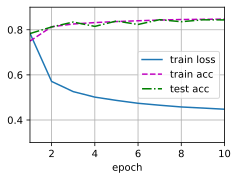

In [19]:
##### %matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
from IPython import display

def get_dataloader_workers():
    """使用4个进程来读取的数据"""
    return 0

def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize)) # 如果有Resize参数传进来，就进行resize操作
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=True,transform=trans,download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=False,transform=trans,download=True)            
    return (data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()),
           data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()))               


batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size) # 返回训练集、测试集的迭代器     

num_inputs = 784
num_outputs = 10
w = torch.normal(0,0.01,size=(num_inputs,num_outputs),requires_grad=True)
b = torch.zeros(num_outputs,requires_grad=True)

def softmax(X):
    X_exp = torch.exp(X) # 每个都进行指数运算
    partition = X_exp.sum(1,keepdim=True) 
    return X_exp / partition # 这里应用了广播机制

# 实现softmax回归模型
def net(X):
    return softmax(torch.matmul(X.reshape((-1,w.shape[0])),w)+b) # -1为默认的批量大小，表示有多少个图片，每个图片用一维的784列个元素表示      

def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)),y]) # y_hat[range(len(y_hat)),y]为把y的标号列表对应的值拿出来。传入的y要是最大概率的标号      

def accuracy(y_hat,y):
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1: # y_hat.shape[1]>1表示不止一个类别，每个类别有各自的概率   
        y_hat = y_hat.argmax(axis=1) # y_hat.argmax(axis=1)为求行最大值的索引
    cmp = y_hat.type(y.dtype) == y # 先判断逻辑运算符==，再赋值给cmp，cmp为布尔类型的数据
    return float(cmp.type(y.dtype).sum()) # 获得y.dtype的类型作为传入参数，将cmp的类型转为y的类型（int型），然后再求和       

# 可以评估在任意模型net的准确率
def evaluate_accuracy(net,data_iter):
    """计算在指定数据集上模型的精度"""
    if isinstance(net,torch.nn.Module): # 如果net模型是torch.nn.Module实现的神经网络的话，将它变成评估模式     
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2) # 正确预测数、预测总数，metric为累加器的实例化对象，里面存了两个数
    for X, y in data_iter:
        metric.add(accuracy(net(X),y),y.numel()) # net(X)将X输入模型，获得预测值。y.numel()为样本总数
    return metric[0] / metric[1] # 分类正确的样本数 / 总样本数

# Accumulator实例中创建了2个变量，用于分别存储正确预测的数量和预测的总数量
class Accumulator:
    """在n个变量上累加"""
    def __init__(self,n):
        self.data = [0,0] * n
        
    def add(self, *args):
        self.data = [a+float(b) for a,b in zip(self.data,args)] # zip函数把两个列表第一个位置元素打包、第二个位置元素打包....
        
    def reset(self):
        self.data = [0.0] * len(self.data)
        
    def __getitem__(self,idx):
        return self.data[idx]

# 训练函数
def train_epoch_ch3(net, train_iter, loss, updater):
    if isinstance(net, torch.nn.Module):
        net.train() # 开启训练模式
    metric = Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat,y) # 计算损失
        if isinstance(updater, torch.optim.Optimizer): # 如果updater是pytorch的优化器的话
            updater.zero_grad()
            l.mean().backward()  # 这里对loss取了平均值出来
            updater.step()
            metric.add(float(l)*len(y),accuracy(y_hat,y),y.size().numel()) # 总的训练损失、样本正确数、样本总数   
        else:
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()),accuracy(y_hat,y),y.numel()) 
    return metric[0] / metric[2], metric[1] / metric[2] # 所有loss累加除以样本总数，总的正确个数除以样本总数  


    
class Animator:
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                ylim=None, xscale='linear',yscale='linear',
                fmts=('-','m--','g-.','r:'),nrows=1,ncols=1,
                figsize=(3.5,2.5)): 
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows,ncols,figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        self.config_axes = lambda: d2l.set_axes(self.axes[0],xlabel,ylabel,xlim,ylim,xscale,yscale,legend)         
        self.X, self.Y, self.fmts = None, None, fmts
        
    def add(self, x, y):
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)] 
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a,b) in enumerate(zip(x,y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

# 总训练函数        
def train_ch3(net,train_iter,test_iter,loss,num_epochs,updater):
    animator = Animator(xlabel='epoch',xlim=[1,num_epochs],ylim=[0.3,0.9],       
                       legend=['train loss','train acc','test acc'])
    for epoch in range(num_epochs):  # 变量num_epochs遍数据
        train_metrics = train_epoch_ch3(net,train_iter,loss,updater) # 返回两个值，一个总损失、一个总正确率
        test_acc = evaluate_accuracy(net, test_iter) # 测试数据集上评估精度，仅返回一个值，总正确率  
        animator.add(epoch+1,train_metrics+(test_acc,)) # train_metrics+(test_acc,) 仅将两个值的正确率相加，
    train_loss, train_acc = train_metrics
    
# 小批量随即梯度下降来优化模型的损失函数
lr = 0.1
def updater(batch_size):
    return d2l.sgd([w,b],lr,batch_size)

num_epochs = 10
train_ch3(net,train_iter,test_iter,cross_entropy,num_epochs,updater)

## 2.10 预测数据

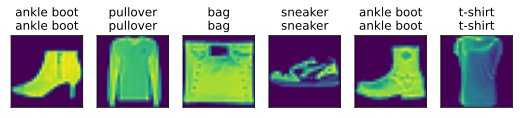

In [20]:
def predict_ch3(net,test_iter,n=6):
    for X, y in test_iter: 
        break # 仅拿出一批六个数据
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues,preds)]
    d2l.show_images(X[0:n].reshape((n,28,28)),1,n,titles=titles[0:n])
    
predict_ch3(net,test_iter)

# 3. Sofmax回归（使用框架）

① 通过深度学习框架的高级API能够使实现softmax回归变得更加容易。

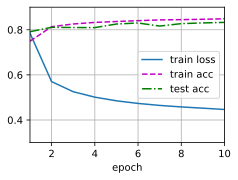

In [21]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

# Softmax回归的输出是一个全连接层
# PyTorch不会隐式地调整输入的形状
# 因此，我们定义了展平层(flatten)在线性层前调整网络输入的形状
net = nn.Sequential(nn.Flatten(),nn.Linear(784,10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01) # 方差为0.01

net.apply(init_weights)
print(net.apply(init_weights)) # net网络的参数用的是init_weights初始化参数

# 在交叉熵损失函数中传递未归一化的预测，并同时计算softmax及其对数
loss = nn.CrossEntropyLoss()
# 使用学习率为0.1的小批量随即梯度下降作为优化算法
trainer = torch.optim.SGD(net.parameters(),lr=0.1)

num_epochs = 10
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)